# Local Projections

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# from statsmodels.tsa.api import VAR
# from statsmodels.regression.linear_model import OLS
# from statsmodels.tsa.tsatools import lagmat, add_trend
# from statsmodels.stats.sandwich_covariance import cov_hac
from scipy.stats import t

In [23]:
# Read data from Excel file containing Ramey (2016) monetary policy data.
data = pd.read_excel('data/Ramey_data.xlsx', sheet_name='Monthlydat6996')
data['LIP'] = data['LIP'] * 100      # x 100 as done in Ramey
data['LCPI'] = data['LCPI'] * 100    # x 100 as done in Ramey
data[['lag_LIP', 'lag_UNEMP', 'lag_LCPI', 'lag_LPCOM', 'lag_FFR', 'lag_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(1)
data[['lag2_LIP', 'lag2_UNEMP', 'lag2_LCPI', 'lag2_LPCOM', 'lag2_FFR', 'lag2_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(2)
data = data.iloc[2:,:] # Take out the first two rows. Alternatively, data = data.dropna()

display(data)

,DATES,LIP,UNEMP,LCPI,FFR,LPCOM,LRCDUR,LRCND,LRCSV,RRORIG,...,lag_LCPI,lag_LPCOM,lag_FFR,lag_RRSHOCK,lag2_LIP,lag2_UNEMP,lag2_LCPI,lag2_LPCOM,lag2_FFR,lag2_RRSHOCK
2,1969.166667,369.101717,3.4,358.629287,6.79,4.665607,2.698471,3.706793,3.317526,-0.245942,...,357.794789,4.655388,6.61,0.000000,367.682712,3.4,357.515069,4.633563,6.30,0.000000
3,1969.250000,368.732825,3.4,359.181774,7.41,4.680092,2.710713,3.705245,3.323020,0.404899,...,358.629287,4.665607,6.79,-0.245942,368.320589,3.4,357.794789,4.655388,6.61,0.000000
4,1969.333333,368.354274,3.4,359.456877,8.67,4.698661,2.710913,3.714304,3.329916,0.203151,...,359.181774,4.680092,7.41,0.404899,369.101717,3.4,358.629287,4.665607,6.79,-0.245942
5,1969.416667,369.326482,3.5,360.004824,8.90,4.712409,2.708583,3.700759,3.332562,-0.020495,...,359.456877,4.698661,8.67,0.203151,368.732825,3.4,359.181774,4.680092,7.41,0.404899
6,1969.500000,369.853024,3.5,360.549785,8.61,4.712409,2.686350,3.707137,3.331954,0.180169,...,360.004824,4.712409,8.90,-0.020495,368.354274,3.4,359.456877,4.698661,8.67,0.203151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1996.583333,436.077491,5.1,505.751888,5.22,5.750348,3.919455,4.310678,4.272644,-0.064381,...,505.624581,5.735120,5.40,-0.040548,435.672165,5.3,505.433315,5.734958,5.27,0.000000
332,1996.666667,436.763355,5.2,506.069449,5.30,5.734861,3.922824,4.309241,4.274414,-0.042311,...,505.751888,5.750348,5.22,-0.064381,435.493418,5.5,505.624581,5.735120,5.40,-0.040548
333,1996.750000,436.686985,5.2,506.386006,5.24,5.696624,3.930668,4.316474,4.274734,0.000000,...,506.069449,5.734861,5.30,-0.042311,436.077491,5.1,505.751888,5.750348,5.22,-0.064381
334,1996.833333,437.555700,5.4,506.701563,5.31,5.651928,3.938568,4.315753,4.277416,0.047883,...,506.386006,5.696624,5.24,0.000000,436.763355,5.2,506.069449,5.734861,5.30,-0.042311


## LP regression

In [24]:

model = sm.formula.ols(formula="LIP ~ RRORIG + LCPI + LPCOM + UNEMP + lag_RRSHOCK + lag_LCPI + \
    lag_LPCOM + lag_UNEMP + lag_LIP + lag_FFR + lag2_RRSHOCK + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_LIP + lag2_FFR", data=data)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags':24})

print(results.summary())

print("Extract the parameters and standard errors")
coefficients = results.params
stderrors = results.bse

theta_LIP = coefficients[1]
se_LIP = stderrors[1]
print(theta_LIP)
print(se_LIP)

                            OLS Regression Results                            
Dep. Variable:                    LIP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:28:23   Log-Likelihood:                -307.94
No. Observations:                 334   AIC:                             649.9
Df Residuals:                     317   BIC:                             714.7
Df Model:                          16                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8075      2.830      1.346   

## LP regression for each horizon

In [25]:

horizon = 48
theta_FFR = np.empty(horizon)
se_FFR = np.empty(horizon)
theta_LIP = np.empty(horizon)
se_LIP = np.empty(horizon)
theta_UNEMP = np.empty(horizon)
se_UNEMP = np.empty(horizon)
theta_LCPI = np.empty(horizon)
se_LCPI = np.empty(horizon)

for h in range(0,horizon):
    data = pd.read_excel('data/Ramey_data.xlsx', sheet_name='Monthlydat6996')
    data['LIP'] = data['LIP'] * 100
    data['LCPI'] = data['LCPI'] * 100
    data[['lag_LIP', 'lag_UNEMP', 'lag_LCPI', 'lag_LPCOM', 'lag_FFR', 'lag_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(1)
    data[['lag2_LIP', 'lag2_UNEMP', 'lag2_LCPI', 'lag2_LPCOM', 'lag2_FFR', 'lag2_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(2)
    data[['LIP', 'UNEMP', 'LCPI', 'FFR']] = data[['LIP', 'UNEMP', 'LCPI', 'FFR']].shift(-h)
    data = data.dropna() 
    
    # Model for Federal Funds Rate
    model_FFR = sm.formula.ols(formula="FFR ~ RRORIG + LIP + LCPI + LPCOM + UNEMP + lag_RRSHOCK + lag_LIP + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_FFR + lag2_RRSHOCK + lag2_LIP + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_FFR", data=data)
    results_FFR = model_FFR.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_FFR = results_FFR.params
    stderrors_FFR = results_FFR.bse

    theta_FFR[h] = coefficients_FFR[1]
    se_FFR[h] = stderrors_FFR[1]

    # Model for Industrial Production
    model_LIP = sm.formula.ols(formula="LIP ~ RRORIG + LCPI + LPCOM + UNEMP + lag_RRSHOCK + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_LIP + lag_FFR + lag2_RRSHOCK + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_LIP + lag2_FFR", data=data)
    results_LIP = model_LIP.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_LIP = results_LIP.params
    stderrors_LIP = results_LIP.bse

    theta_LIP[h] = coefficients_LIP[1]
    se_LIP[h] = stderrors_LIP[1]
    
    # Model for Unemployment
    model_UNEMP = sm.formula.ols(formula="UNEMP ~ RRORIG + LIP + LCPI + LPCOM + lag_RRSHOCK + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_LIP + lag_FFR + lag2_RRSHOCK + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_LIP + lag2_FFR", data=data)
    results_UNEMP = model_UNEMP.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_UNEMP = results_UNEMP.params
    stderrors_UNEMP = results_UNEMP.bse

    theta_UNEMP[h] = coefficients_UNEMP[1]
    se_UNEMP[h] = stderrors_UNEMP[1]
    
    # Model for Inflation
    model_LCPI = sm.formula.ols(formula="LCPI ~ RRORIG + LIP + LPCOM + UNEMP + lag_RRSHOCK + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_LIP + lag_FFR + lag2_RRSHOCK + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_LIP + lag2_FFR", data=data)
    results_LCPI = model_LCPI.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_LCPI = results_LCPI.params
    stderrors_LCPI = results_LCPI.bse

    theta_LCPI[h] = coefficients_LCPI[1]
    se_LCPI[h] = stderrors_LCPI[1]
    

# How to determine the number of lags in HAC:
# Annual data = 1 lag, 2 lags. Quarterly data= 4 up to 8 lags. Monthly data = 12 up to 24 lags.

## Plot IRFs

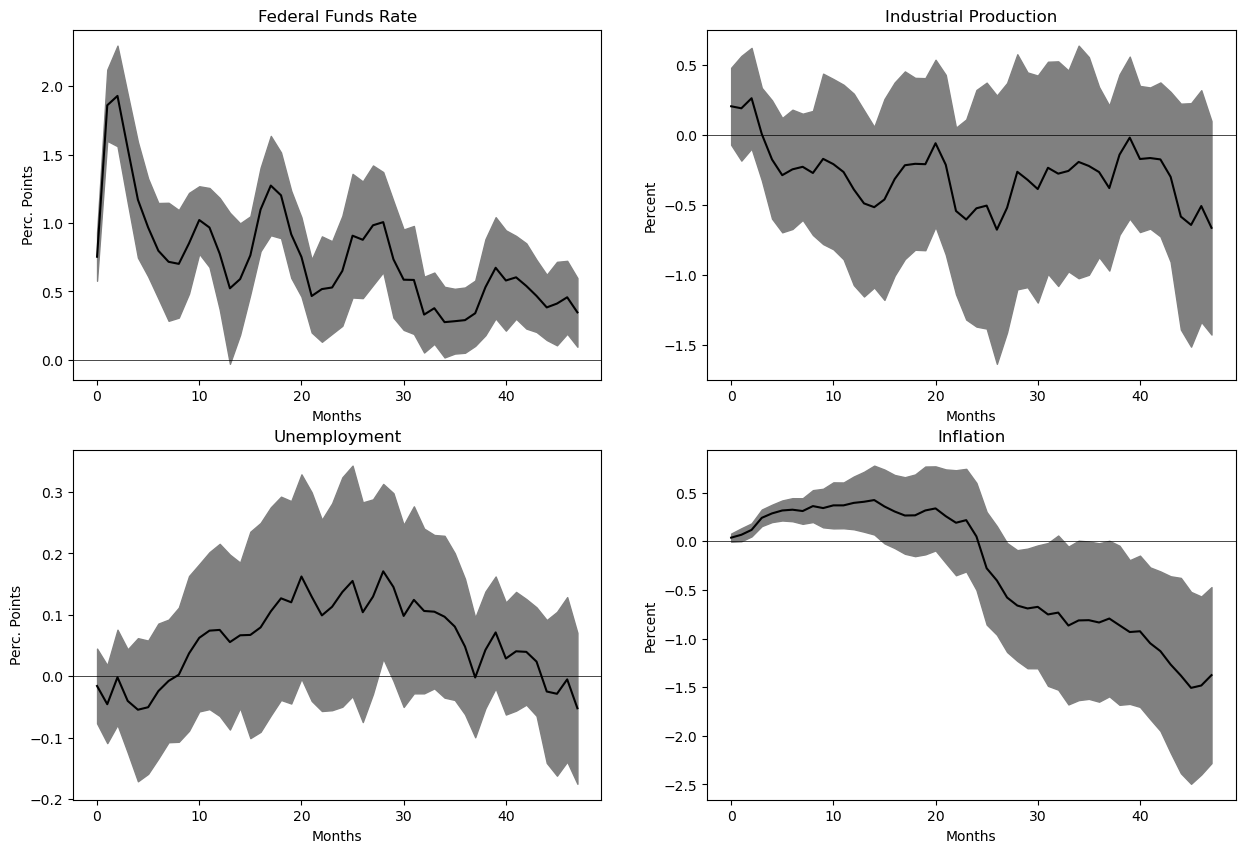

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0,0].plot(np.arange(len(theta_FFR)), theta_FFR, color='black')
axs[0,0].fill_between(np.arange(len(theta_FFR)), theta_FFR - 1.645 *  se_FFR, theta_FFR + 1.645 *  se_FFR, color='grey')
axs[0,0].axhline(0, color='black', linewidth=0.5)
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('Perc. Points')
axs[0,0].set_title('Federal Funds Rate')

axs[0,1].plot(np.arange(len(theta_LIP)), theta_LIP, color='black')
axs[0,1].fill_between(np.arange(len(theta_LIP)), theta_LIP - 1.645 *  se_LIP, theta_LIP + 1.645 *  se_LIP, color='grey')
axs[0,1].axhline(0, color='black', linewidth=0.5)
axs[0,1].set_xlabel('Months')
axs[0,1].set_ylabel('Percent')
axs[0,1].set_title('Industrial Production')

axs[1,0].plot(np.arange(len(theta_UNEMP)), theta_UNEMP, color='black')
axs[1,0].fill_between(np.arange(len(theta_UNEMP)), theta_UNEMP - 1.645 *  se_UNEMP, theta_UNEMP + 1.645 *  se_UNEMP, color='grey')
axs[1,0].axhline(0, color='black', linewidth=0.5)
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('Perc. Points')
axs[1,0].set_title('Unemployment')

axs[1,1].plot(np.arange(len(theta_LCPI)), theta_LCPI, color='black')
axs[1,1].fill_between(np.arange(len(theta_LCPI)), theta_LCPI - 1.645 *  se_LCPI, theta_LCPI + 1.645 *  se_LCPI, color='grey')
axs[1,1].axhline(0, color='black', linewidth=0.5)
axs[1,1].set_xlabel('Months')
axs[1,1].set_ylabel('Percent')
axs[1,1].set_title('Inflation')
plt.show()

# Local Projection-IV

## 1. Stage regression

In [27]:
# Read data from Excel file containing Ramey (2016) monetary policy data.
data = pd.read_excel('data/Ramey_data.xlsx', sheet_name='Monthlydat6996')
data['LIP'] = data['LIP'] * 100      # x 100 as done in Ramey
data['LCPI'] = data['LCPI'] * 100    # x 100 as done in Ramey

T = data.shape[0]

data[['lag_LIP', 'lag_UNEMP', 'lag_LCPI', 'lag_LPCOM', 'lag_FFR', 'lag_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(1)
data[['lag2_LIP', 'lag2_UNEMP', 'lag2_LCPI', 'lag2_LPCOM', 'lag2_FFR', 'lag2_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(2)
data = data.iloc[2:,:] # Take out the first two rows. Alternatively, data = data.dropna()

In [28]:
stage1_reg = sm.formula.ols(formula="FFR ~ RRORIG + LIP + LCPI + LPCOM + UNEMP + lag_RRSHOCK + lag_LIP + lag_LCPI + \
    lag_LPCOM + lag_UNEMP + lag_FFR + lag2_RRSHOCK + lag2_LIP + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_FFR", data=data)
results = stage1_reg.fit(cov_type='HAC', cov_kwds={'maxlags':24})

print(results.summary())

print("Extract the parameters")
coefficients = results.params

                            OLS Regression Results                            
Dep. Variable:                    FFR   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     3942.
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:40:11   Log-Likelihood:                -200.17
No. Observations:                 334   AIC:                             436.3
Df Residuals:                     316   BIC:                             504.9
Df Model:                          17                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.0744      1.024      2.025   

In [29]:
X = data[["RRORIG", "LIP", "LCPI", "LPCOM", "UNEMP", "lag_RRSHOCK", "lag_LIP", "lag_LCPI", "lag_LPCOM",
    "lag_UNEMP", "lag_FFR", "lag2_RRSHOCK", "lag2_LIP", "lag2_LCPI", "lag2_LPCOM", "lag2_UNEMP", "lag2_FFR"]]

X = X.to_numpy()
X = np.hstack((np.ones((len(X), 1)), X))  # Add column of ones (i.e. a constant for the regression).

# Obtain the fitted values for FFR
FFR_hat =  X @ coefficients
FFR_hat = np.hstack(((np.zeros(T-len(FFR_hat))),FFR_hat)) # Correcting for the loss of data due to the lags --> Needed for the 2. stage

## 2. Stage regression(s)

In [30]:
horizon = 48
theta_FFR = np.empty(horizon)
se_FFR = np.empty(horizon)
theta_LIP = np.empty(horizon)
se_LIP = np.empty(horizon)
theta_UNEMP = np.empty(horizon)
se_UNEMP = np.empty(horizon)
theta_LCPI = np.empty(horizon)
se_LCPI = np.empty(horizon)

for h in range(0,horizon):
    data = pd.read_excel('data/Ramey_data.xlsx', sheet_name='Monthlydat6996')
    data['LIP'] = data['LIP'] * 100
    data['LCPI'] = data['LCPI'] * 100
    data['FFR_hat'] = FFR_hat   # Now I add a new column with the FFR_hat from the first regression
    data[['lag_LIP', 'lag_UNEMP', 'lag_LCPI', 'lag_LPCOM', 'lag_FFR', 'lag_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(1)
    data[['lag2_LIP', 'lag2_UNEMP', 'lag2_LCPI', 'lag2_LPCOM', 'lag2_FFR', 'lag2_RRSHOCK']] = data[['LIP', 'UNEMP', 'LCPI', 'LPCOM', 'FFR', 'RRORIG']].shift(2)
    data[['LIP', 'UNEMP', 'LCPI', 'FFR']] = data[['LIP', 'UNEMP', 'LCPI', 'FFR']].shift(-h)
    data = data.dropna()
    
    ## Now, in every regression, substitute every RRORIG for the FFR_hat
    
    # Model for Federal Funds Rate
    model_FFR = sm.formula.ols(formula="FFR ~ FFR_hat + LIP + LCPI + LPCOM + UNEMP + lag_RRSHOCK + lag_LIP + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_FFR + lag2_RRSHOCK + lag2_LIP + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_FFR", data=data)
    results_FFR = model_FFR.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_FFR = results_FFR.params
    stderrors_FFR = results_FFR.bse

    theta_FFR[h] = coefficients_FFR[1]
    se_FFR[h] = stderrors_FFR[1]

    # Model for Industrial Production
    model_LIP = sm.formula.ols(formula="LIP ~ FFR_hat + LCPI + LPCOM + UNEMP + lag_RRSHOCK + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_LIP + lag_FFR + lag2_RRSHOCK + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_LIP + lag2_FFR", data=data)
    results_LIP = model_LIP.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_LIP = results_LIP.params
    stderrors_LIP = results_LIP.bse

    theta_LIP[h] = coefficients_LIP[1]
    se_LIP[h] = stderrors_LIP[1]
    
    # Model for Unemployment
    model_UNEMP = sm.formula.ols(formula="UNEMP ~ FFR_hat + LIP + LCPI + LPCOM + lag_RRSHOCK + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_LIP + lag_FFR + lag2_RRSHOCK + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_LIP + lag2_FFR", data=data)
    results_UNEMP = model_UNEMP.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_UNEMP = results_UNEMP.params
    stderrors_UNEMP = results_UNEMP.bse

    theta_UNEMP[h] = coefficients_UNEMP[1]
    se_UNEMP[h] = stderrors_UNEMP[1]
    
    # Model for Inflation
    model_LCPI = sm.formula.ols(formula="LCPI ~ FFR_hat + LIP + LPCOM + UNEMP + lag_RRSHOCK + lag_LCPI + \
        lag_LPCOM + lag_UNEMP + lag_LIP + lag_FFR + lag2_RRSHOCK + lag2_LCPI + lag2_LPCOM + lag2_UNEMP + lag2_LIP + lag2_FFR", data=data)
    results_LCPI = model_LCPI.fit(cov_type='HAC', cov_kwds={'maxlags':24})
    
    coefficients_LCPI = results_LCPI.params
    stderrors_LCPI = results_LCPI.bse

    theta_LCPI[h] = coefficients_LCPI[1]
    se_LCPI[h] = stderrors_LCPI[1]

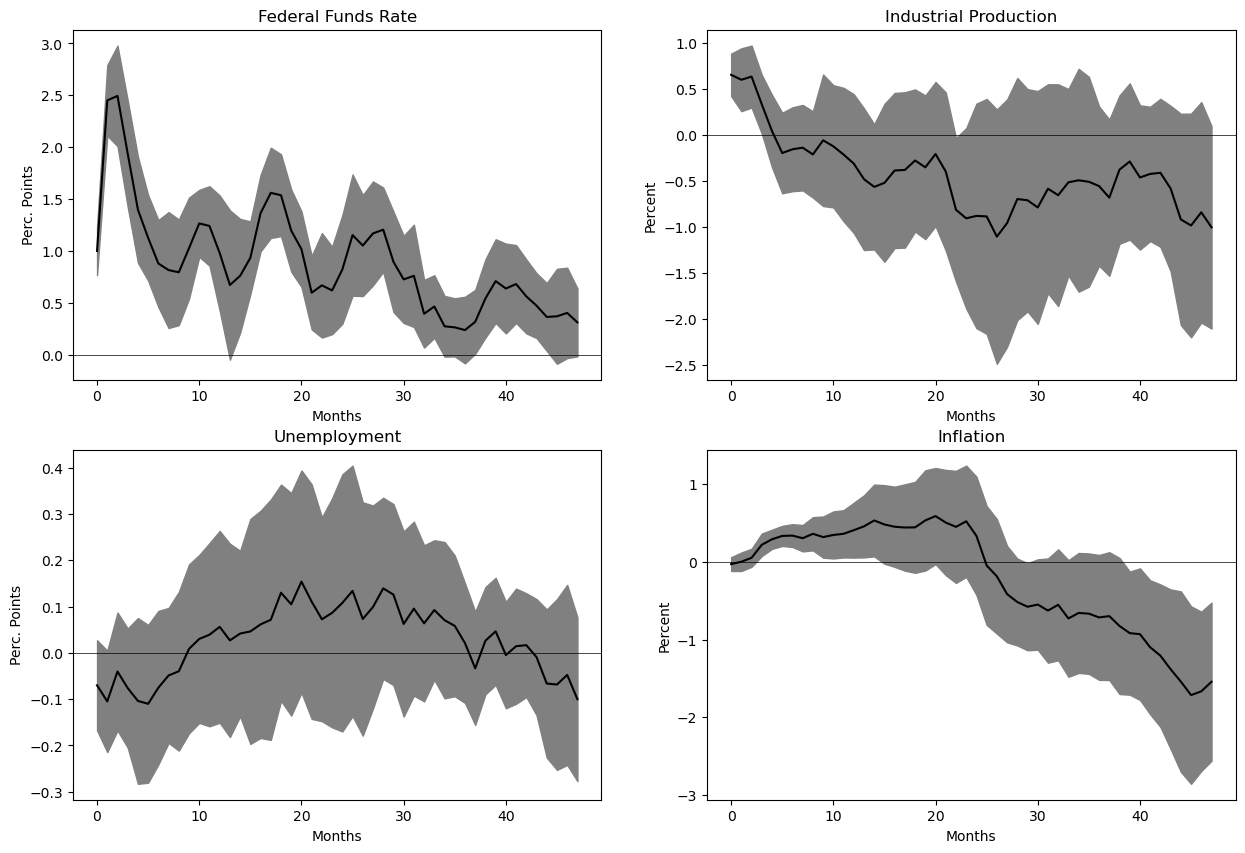

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0,0].plot(np.arange(len(theta_FFR)), theta_FFR, color='black')
axs[0,0].fill_between(np.arange(len(theta_FFR)), theta_FFR - 1.645 *  se_FFR, theta_FFR + 1.645 *  se_FFR, color='grey')
axs[0,0].axhline(0, color='black', linewidth=0.5)
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('Perc. Points')
axs[0,0].set_title('Federal Funds Rate')

axs[0,1].plot(np.arange(len(theta_LIP)), theta_LIP, color='black')
axs[0,1].fill_between(np.arange(len(theta_LIP)), theta_LIP - 1.645 *  se_LIP, theta_LIP + 1.645 *  se_LIP, color='grey')
axs[0,1].axhline(0, color='black', linewidth=0.5)
axs[0,1].set_xlabel('Months')
axs[0,1].set_ylabel('Percent')
axs[0,1].set_title('Industrial Production')

axs[1,0].plot(np.arange(len(theta_UNEMP)), theta_UNEMP, color='black')
axs[1,0].fill_between(np.arange(len(theta_UNEMP)), theta_UNEMP - 1.645 *  se_UNEMP, theta_UNEMP + 1.645 *  se_UNEMP, color='grey')
axs[1,0].axhline(0, color='black', linewidth=0.5)
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('Perc. Points')
axs[1,0].set_title('Unemployment')

axs[1,1].plot(np.arange(len(theta_LCPI)), theta_LCPI, color='black')
axs[1,1].fill_between(np.arange(len(theta_LCPI)), theta_LCPI - 1.645 *  se_LCPI, theta_LCPI + 1.645 *  se_LCPI, color='grey')
axs[1,1].axhline(0, color='black', linewidth=0.5)
axs[1,1].set_xlabel('Months')
axs[1,1].set_ylabel('Percent')
axs[1,1].set_title('Inflation')
plt.show()